In [1]:
# DEC. 2022
# Pipeline by Zhilin Ning

# Load libraries
#.libPaths('/home/zlning/R/lib/')
library(scater)
library(Seurat)
library(tidyverse)
library(cowplot)
library(Matrix.utils)
library(edgeR)
library(dplyr)
library(magrittr)
library(Matrix)
library(purrr)
library(reshape2)
library(S4Vectors)
library(tibble)
library(SingleCellExperiment)
library(pheatmap)
library(apeglm)
library(png)
library(DESeq2)
library(RColorBrewer)
library(hdf5r)
library(ggpubr)
library(lme4)
library(ggthemes)
library(GEOquery) 

载入需要的程辑包：SingleCellExperiment

载入需要的程辑包：SummarizedExperiment

载入需要的程辑包：MatrixGenerics

载入需要的程辑包：matrixStats


载入程辑包：‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSd

In [2]:
options(timeout=120000000000)
options( 'download.file.method.GEOquery' = 'libcurl' )
gset <- getGEO('GSE176078', destdir=".", AnnotGPL = T, getGPL = T) 
cli<-pData(gset[[1]])

Found 1 file(s)

GSE176078_series_matrix.txt.gz

Using locally cached version: ./GSE176078_series_matrix.txt.gz

Annotation GPL not available, so will use submitter GPL instead

Using locally cached version of GPL18573 found here:
./GPL18573.soft.gz 



In [3]:
options(repr.matrix.max.cols=ncol(cli), repr.matrix.max.rows=5)
cli

title    geo_accession status                submission_date
GSM5354513 CID3586  GSM5354513    Public on Jun 24 2021 Jun 03 2021    
GSM5354514 CID3838  GSM5354514    Public on Jun 24 2021 Jun 03 2021    
GSM5354515 CID3921  GSM5354515    Public on Jun 24 2021 Jun 03 2021    
⋮          ⋮        ⋮             ⋮                     ⋮              
GSM5354537 CID4530N GSM5354537    Public on Jun 24 2021 Jun 03 2021    
GSM5354538 CID4535  GSM5354538    Public on Jun 24 2021 Jun 03 2021    
           last_update_date type channel_count source_name_ch1 organism_ch1
GSM5354513 Jun 26 2021      SRA  1             Mammary Tumor   Homo sapiens
GSM5354514 Jun 26 2021      SRA  1             Mammary Tumor   Homo sapiens
GSM5354515 Jun 26 2021      SRA  1             Mammary Tumor   Homo sapiens
⋮          ⋮                ⋮    ⋮             ⋮               ⋮           
GSM5354537 Jun 26 2021      SRA  1             Mammary Tumor   Homo sapiens
GSM5354538 Jun 26 2021      SRA  1             Mammary Tumor   Homo sapiens
           characteristics_ch1         characteristics_ch1.1
GSM5354513 clinical_subtype: HER2+/ER+ gender: female       
GSM5354514 clinical_subtype: HER2+     gender: female       
GSM5354515 clinical_subtype: HER2+     gender: female       
⋮          ⋮                           ⋮                    
GSM5354537 clinical_subtype: ER+       gender: female       
GSM5354538 clinical_subtype: ER+       gender: female       
           characteristics_ch1.2        molecule_ch1
GSM5354513 tissue: Primary Breast Tumor total RNA   
GSM5354514 tissue: Primary Breast Tumor total RNA   
GSM5354515 tissue: Primary Breast Tumor total RNA   
⋮          ⋮                            ⋮           
GSM5354537 tissue: Primary Breast Tumor total RNA   
GSM5354538 tissue: Primary Breast Tumor total RNA   
           extract_protocol_ch1                                                                                                                                                                                                                                    
GSM5354513 Single-cell sequencing was performed using the Chromium Single-Cell v2 3’ and 5’ Chemistry Library, Gel Bead, Multiplex and Chip Kits (10X Genomics) according to the manufacturer's protocol. A total of 5,000 to 7,000 cells were targeted per well.
GSM5354514 Single-cell sequencing was performed using the Chromium Single-Cell v2 3’ and 5’ Chemistry Library, Gel Bead, Multiplex and Chip Kits (10X Genomics) according to the manufacturer's protocol. A total of 5,000 to 7,000 cells were targeted per well.
GSM5354515 Single-cell sequencing was performed using the Chromium Single-Cell v2 3’ and 5’ Chemistry Library, Gel Bead, Multiplex and Chip Kits (10X Genomics) according to the manufacturer's protocol. A total of 5,000 to 7,000 cells were targeted per well.
⋮          ⋮                                                                                                                                                                                                                                                       
GSM5354537 Single-cell sequencing was performed using the Chromium Single-Cell v2 3’ and 5’ Chemistry Library, Gel Bead, Multiplex and Chip Kits (10X Genomics) according to the manufacturer's protocol. A total of 5,000 to 7,000 cells were targeted per well.
GSM5354538 Single-cell sequencing was performed using the Chromium Single-Cell v2 3’ and 5’ Chemistry Library, Gel Bead, Multiplex and Chip Kits (10X Genomics) according to the manufacturer's protocol. A total of 5,000 to 7,000 cells were targeted per well.
           extract_protocol_ch1.1                                                                                                                                                                              
GSM5354513 Libraries were sequenced on the NextSeq 500 platform (Illumina) with pair-ended sequencing and dual indexing. A total of 26, 8 and 98 cycles were ru

In [4]:
meta <- data.frame(sample = cli$title, 
                   geo_accession = cli$`geo_accession`, 
                   clinical_subtype = cli$`clinical_subtype:ch1`, 
                   patient = cli$`tissue:ch1`)

In [5]:
meta

sample   geo_accession clinical_subtype patient             
1  CID3586  GSM5354513    HER2+/ER+        Primary Breast Tumor
2  CID3838  GSM5354514    HER2+            Primary Breast Tumor
3  CID3921  GSM5354515    HER2+            Primary Breast Tumor
⋮  ⋮        ⋮             ⋮                ⋮                   
25 CID4530N GSM5354537    ER+              Primary Breast Tumor
26 CID4535  GSM5354538    ER+              Primary Breast Tumor

In [6]:
meta.1 <- read.csv("./Wu_etal_2021_BRCA_scRNASeq/metadata.csv")

In [7]:
meta.1

X                        orig.ident nCount_RNA nFeature_RNA percent.mito
1      CID3586_AAGACCTCAGCATGAG CID3586    4581       1689         1.506221    
2      CID3586_AAGGTTCGTAGTACCT CID3586    1726        779         5.793743    
3      CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514         1.383238    
⋮      ⋮                        ⋮          ⋮          ⋮            ⋮           
100063 CID4398_TGCCCATGTTACGGAG CID4398    5117        870         2.208325    
100064 CID4398_TTGAACGTCCTATTCA CID4398    6679       1231         2.126067    
       subtype celltype_subset     celltype_minor    celltype_major
1      HER2+   Endothelial ACKR1   Endothelial ACKR1 Endothelial   
2      HER2+   Endothelial ACKR1   Endothelial ACKR1 Endothelial   
3      HER2+   Endothelial ACKR1   Endothelial ACKR1 Endothelial   
⋮      ⋮       ⋮                   ⋮                 ⋮             
100063 ER+     Myeloid_c0_DC_LAMP3 DCs               Myeloid       
100064 ER+     Myeloid_c0_DC_LAMP3 DCs               Myeloid

In [8]:
table(paste0(meta.1$orig.ident, ":", meta.1$subtype))


 CID3586:HER2+  CID3838:HER2+  CID3921:HER2+    CID3941:ER+   CID3946:TNBC 
          6178           2353           3024            631            774 
   CID3948:ER+   CID3963:TNBC    CID4040:ER+  CID4066:HER2+    CID4067:ER+ 
          2327           3527           2531           5309           3764 
  CID4290A:ER+    CID4398:ER+  CID44041:TNBC    CID4461:ER+    CID4463:ER+ 
          5789           4451           2131            631           1138 
  CID4465:TNBC    CID4471:ER+   CID4495:TNBC  CID44971:TNBC  CID44991:TNBC 
          1564           8609           7985           7986           7023 
  CID4513:TNBC   CID4515:TNBC CID45171:HER2+   CID4523:TNBC   CID4530N:ER+ 
          5619           4149           2447           1754           4409 
   CID4535:ER+ 
          3961 

In [9]:
table(meta.1$celltype_major)
table(meta$clinical_subtype)
table(meta.1$celltype_subset)


          B-cells              CAFs Cancer Epithelial       Endothelial 
             3206              6573             24489              7605 
          Myeloid Normal Epithelial      Plasmablasts               PVL 
             9675              4355              3524              5423 
          T-cells 
            35214 


      ER+     HER2+ HER2+/ER+      TNBC 
       12         3         2         9 


                 B cells Memory                   B cells Naive 
                           2581                             625 
          CAFs MSC iCAF-like s1           CAFs MSC iCAF-like s2 
                           2309                             844 
             CAFs myCAF like s4              CAFs myCAF like s5 
                            602                            2265 
          CAFs Transitioning s3                 Cancer Basal SC 
                            553                            4312 
                 Cancer Cycling                  Cancer Her2 SC 
                           5359                            3708 
                 Cancer LumA SC                  Cancer LumB SC 
                           7742                            3368 
                    Cycling PVL                 Cycling_Myeloid 
                             50                             463 
              Endothelial ACKR1              Endothelial CXCL12 
                        

In [10]:
dir = "./Wu_etal_2021_BRCA_scRNASeq/"
list.files(dir)

[1] "barcodes.tsv.gz" "data"            "features.tsv.gz" "matrix.mtx.gz"  
[5] "metadata.csv"

In [11]:
counts <- Read10X(data.dir = dir, gene.column =1)

In [12]:
dim(counts)

[1]  29733 100064

In [13]:
scRNA <- CreateSeuratObject(counts = counts,project = "BC",min.cells = 3, min.features = 200)

In [14]:
scRNA@meta.data

orig.ident nCount_RNA nFeature_RNA
CID3586_AAGACCTCAGCATGAG CID3586    4581       1689        
CID3586_AAGGTTCGTAGTACCT CID3586    1726        779        
CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514        
⋮                        ⋮          ⋮          ⋮           
CID4398_TGCCCATGTTACGGAG CID4398    5117        870        
CID4398_TTGAACGTCCTATTCA CID4398    6679       1231

In [15]:
scRNA@assays$RNA@counts

  [[ suppressing 32 column names ‘CID3586_AAGACCTCAGCATGAG’, ‘CID3586_AAGGTTCGTAGTACCT’, ‘CID3586_ACCAGTAGTTGTGGCC’ ... ]]

  [[ suppressing 32 column names ‘CID3586_AAGACCTCAGCATGAG’, ‘CID3586_AAGGTTCGTAGTACCT’, ‘CID3586_ACCAGTAGTTGTGGCC’ ... ]]

  [[ suppressing 32 column names ‘CID3586_AAGACCTCAGCATGAG’, ‘CID3586_AAGGTTCGTAGTACCT’, ‘CID3586_ACCAGTAGTTGTGGCC’ ... ]]



27719 x 100064 sparse Matrix of class "dgCMatrix"
                                                                                              
RP11-34P13.7      .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
FO538757.3        .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
FO538757.2        .  .  .  .  .  . . .  .  . .  .  1 . 1  .  . . . .  .  1  . 1  .  .  .  1  .
AP006222.2        .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
RP4-669L17.10     .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
RP5-857K21.4      .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
RP11-206L10.9     .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
LINC00115         .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .
FAM41C            .  .  .  .  .  . . .  .  . .  .  . . .  .  . . . .  .  .  . .  .  .  .  .  .


In [16]:
meta.2 <- meta.1[match(rownames(scRNA@meta.data), meta.1$X),]
meta.2

X                        orig.ident nCount_RNA nFeature_RNA percent.mito
1      CID3586_AAGACCTCAGCATGAG CID3586    4581       1689         1.506221    
2      CID3586_AAGGTTCGTAGTACCT CID3586    1726        779         5.793743    
3      CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514         1.383238    
⋮      ⋮                        ⋮          ⋮          ⋮            ⋮           
100063 CID4398_TGCCCATGTTACGGAG CID4398    5117        870         2.208325    
100064 CID4398_TTGAACGTCCTATTCA CID4398    6679       1231         2.126067    
       subtype celltype_subset     celltype_minor    celltype_major
1      HER2+   Endothelial ACKR1   Endothelial ACKR1 Endothelial   
2      HER2+   Endothelial ACKR1   Endothelial ACKR1 Endothelial   
3      HER2+   Endothelial ACKR1   Endothelial ACKR1 Endothelial   
⋮      ⋮       ⋮                   ⋮                 ⋮             
100063 ER+     Myeloid_c0_DC_LAMP3 DCs               Myeloid       
100064 ER+     Myeloid_c0_DC_LAMP3 DCs               Myeloid

In [17]:
table(scRNA$nFeature_RNA == meta.2$nFeature_RNA)


FALSE  TRUE 
 2620 97444 

In [18]:
test <- data.frame(scRNA = scRNA$nFeature_RNA, meta = meta.2$nFeature_RNA)

In [19]:
test$dd <- test$scRNA -test$meta

In [20]:
table(test$dd)


   -6    -5    -4    -3    -2    -1     0 
    1     2     2     7   109  2499 97444 

In [21]:
scRNA$percent.mito <- meta.2$percent.mito
scRNA$subtype <- meta.2$subtype
scRNA$celltype_subset <- meta.2$celltype_subset
scRNA$celltype_minor <- meta.2$celltype_minor
scRNA$celltype_major <- meta.2$celltype_major

In [22]:
scRNA@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mito
CID3586_AAGACCTCAGCATGAG CID3586    4581       1689         1.506221    
CID3586_AAGGTTCGTAGTACCT CID3586    1726        779         5.793743    
CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514         1.383238    
⋮                        ⋮          ⋮          ⋮            ⋮           
CID4398_TGCCCATGTTACGGAG CID4398    5117        870         2.208325    
CID4398_TTGAACGTCCTATTCA CID4398    6679       1231         2.126067    
                         subtype celltype_subset     celltype_minor   
CID3586_AAGACCTCAGCATGAG HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_AAGGTTCGTAGTACCT HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_ACCAGTAGTTGTGGCC HER2+   Endothelial ACKR1   Endothelial ACKR1
⋮                        ⋮       ⋮                   ⋮                
CID4398_TGCCCATGTTACGGAG ER+     Myeloid_c0_DC_LAMP3 DCs              
CID4398_TTGAACGTCCTATTCA ER+     Myeloid_c0_DC_LAMP3 DCs              
                         celltype_major
CID3586_AAGACCTCAGCATGAG Endothelial   
CID3586_AAGGTTCGTAGTACCT Endothelial   
CID3586_ACCAGTAGTTGTGGCC Endothelial   
⋮                        ⋮             
CID4398_TGCCCATGTTACGGAG Myeloid       
CID4398_TTGAACGTCCTATTCA Myeloid

In [23]:
summary(scRNA$percent.mito)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.181   5.145   6.070   8.095  19.997 

In [24]:
#cell has been filtered

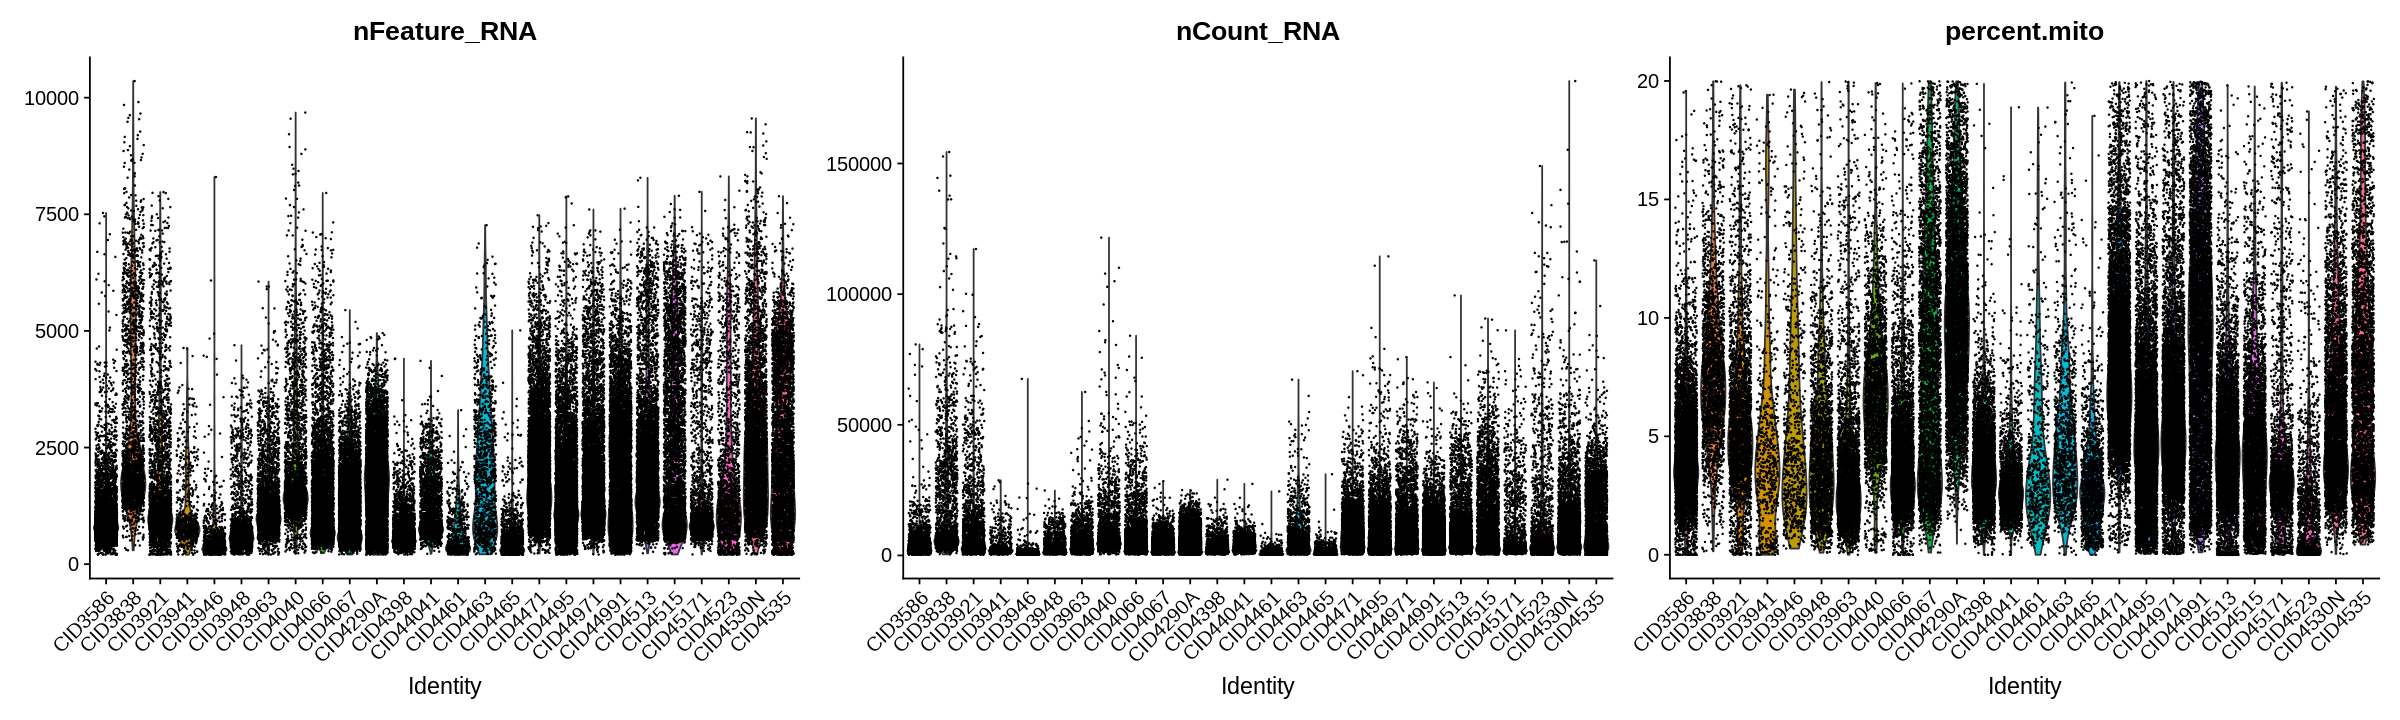

In [25]:
options(repr.plot.width=20,repr.plot.height=6)

VlnPlot(object = scRNA, features = c("nFeature_RNA", "nCount_RNA", "percent.mito"), ncol = 3)


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



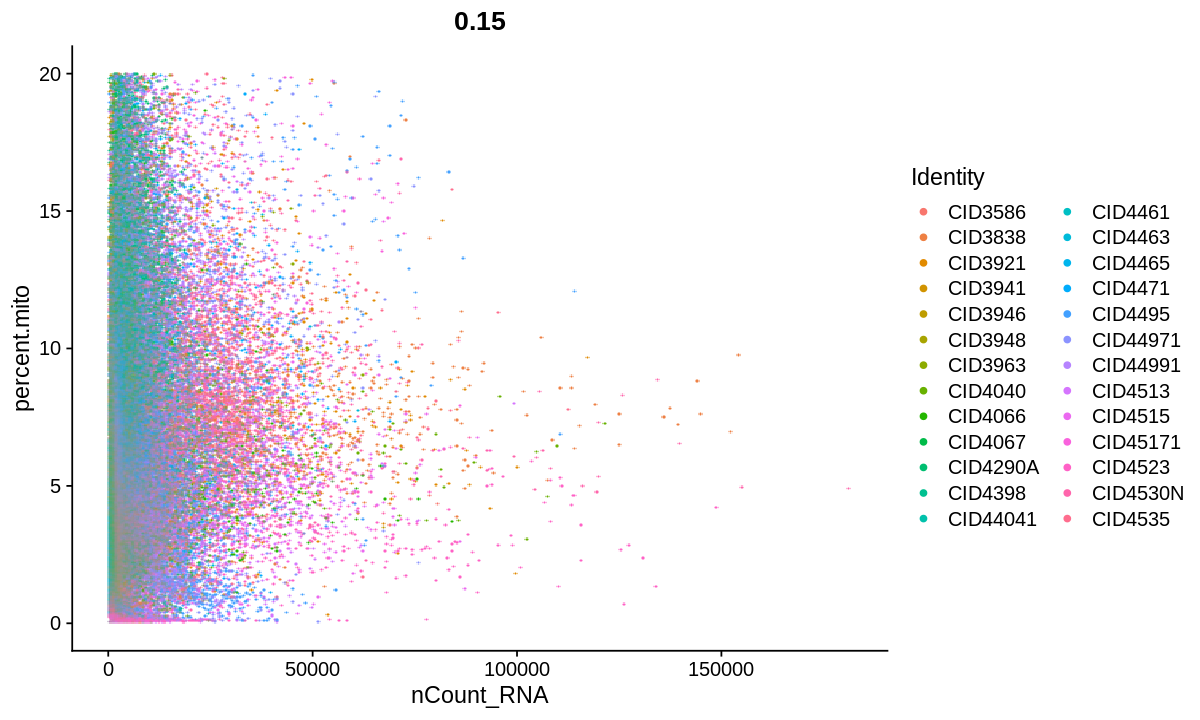

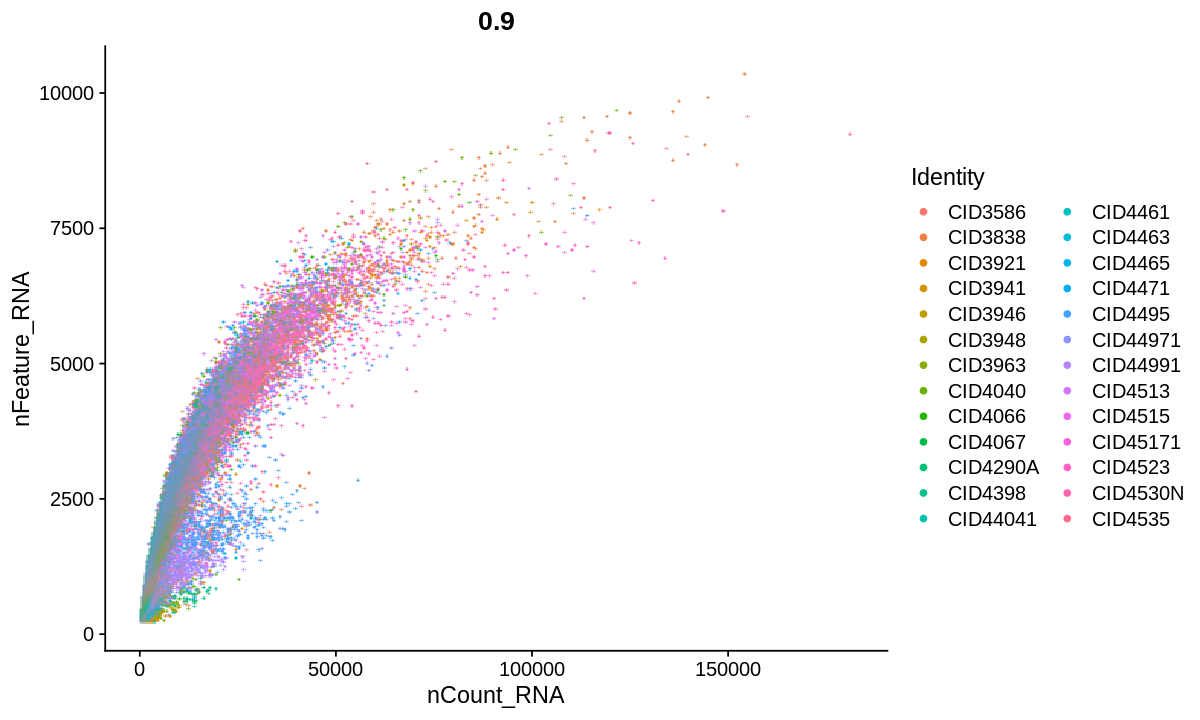

In [26]:
options(repr.plot.width=10,repr.plot.height=6)

plot1 <- FeatureScatter(object = scRNA, feature1 = "nCount_RNA", feature2 = "percent.mito",pt.size=1.5)
plot1
plot2 <- FeatureScatter(object = scRNA, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",,pt.size=1.5)
plot2

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


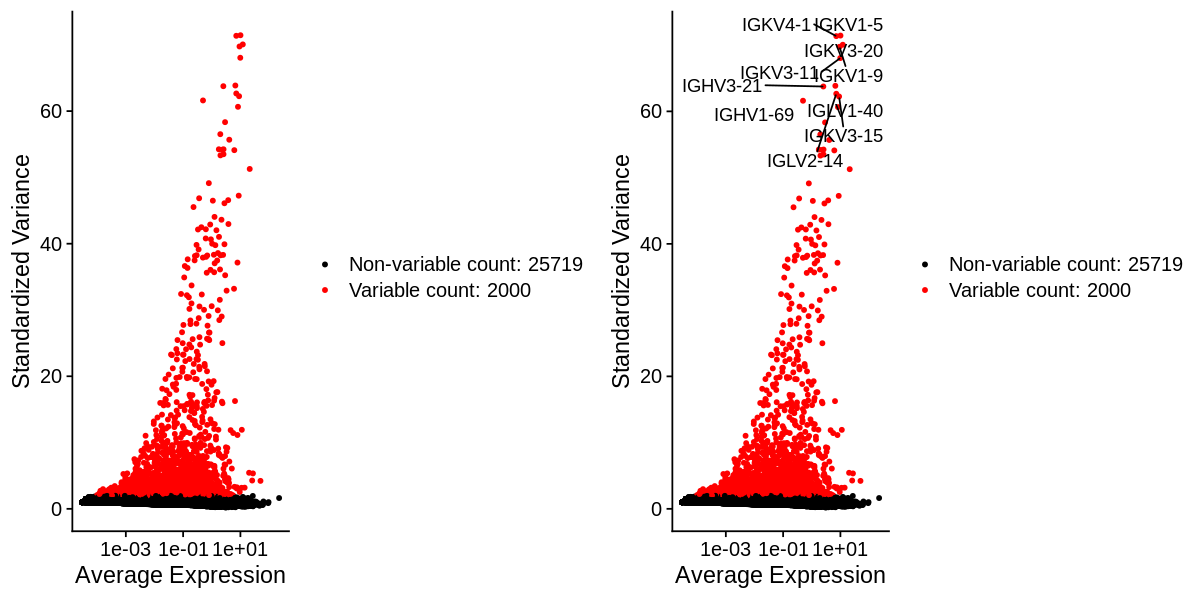

In [27]:
scRNA <- NormalizeData(object = scRNA, normalization.method = "LogNormalize", scale.factor = 10000)

scRNA <- FindVariableFeatures(object = scRNA, selection.method = "vst", nfeatures = 2000)

options(repr.plot.width=10,repr.plot.height=5)

top10 <- head(x = VariableFeatures(object = scRNA), 10)
#pdf(file="04.featureVar.pdf",width=10,height=6)     
plot1 <- VariableFeaturePlot(object = scRNA)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
#dev.off()

Centering and scaling data matrix

PC_ 1 
Positive:  SPARC, COL1A2, CALD1, COL6A2, COL1A1, IGFBP7, COL3A1, BGN, COL6A1, DCN 
	   AEBP1, COL6A3, C1S, LUM, PCOLCE, COL5A2, CTSK, THY1, SPARCL1, RARRES2 
	   CCDC80, FSTL1, MYL9, SERPINF1, SFRP2, MXRA8, CTGF, TIMP3, C1R, NNMT 
Negative:  ITGB2, CCL4, GPR183, CD24, TYROBP, HMGA1, NCF1, HLA-DQA1, C1orf162, FCER1G 
	   AREG, HLA-DQB1, HLA-DPA1, AIM1, AIF1, BCL2A1, LYZ, HLA-DPB1, HLA-DRB5, PLEK 
	   SPI1, LST1, CCR7, CD83, MS4A7, MS4A6A, CCL4L2, CCL3, AZGP1, GZMK 
PC_ 2 
Positive:  C1QA, C1QB, AIF1, CD68, C1QC, TYROBP, MS4A6A, FCER1G, CYBB, SPI1 
	   FCGR2A, FCGR3A, LYZ, CSF1R, CD14, LILRB4, IGSF6, C5AR1, CD163, MS4A4A 
	   FCGR1A, APOC1, MSR1, LST1, HLA-DPA1, VSIG4, SLCO2B1, RASSF4, PILRA, HLA-DRA 
Negative:  AZGP1, FXYD3, KRT7, CD24, TACSTD2, TSPAN13, ZG16B, AGR2, S100A14, MAL2 
	   CRABP2, EFNA1, MGP, AGR3, ANKRD30A, STARD10, TFF3, FASN, GPRC5A, LRRC26 
	   PIP, SLPI, SCGB2A2, WFDC2, CALML5, PDZK1IP1, SLC39A6, TMC5, RHOV, TFAP2B 
PC_ 3 
Posi

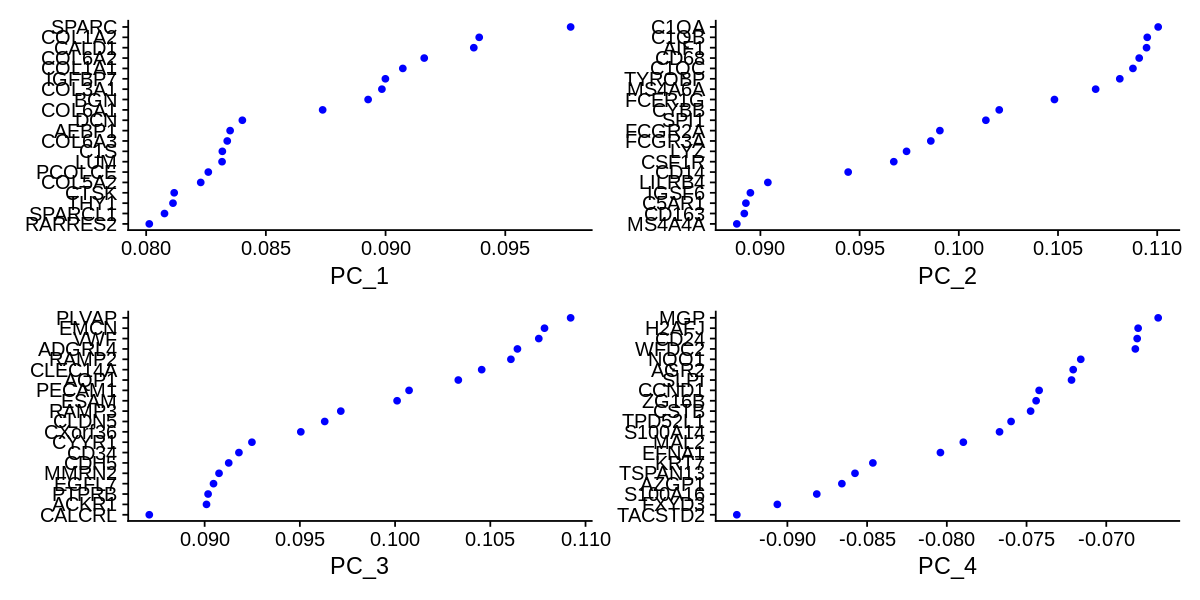

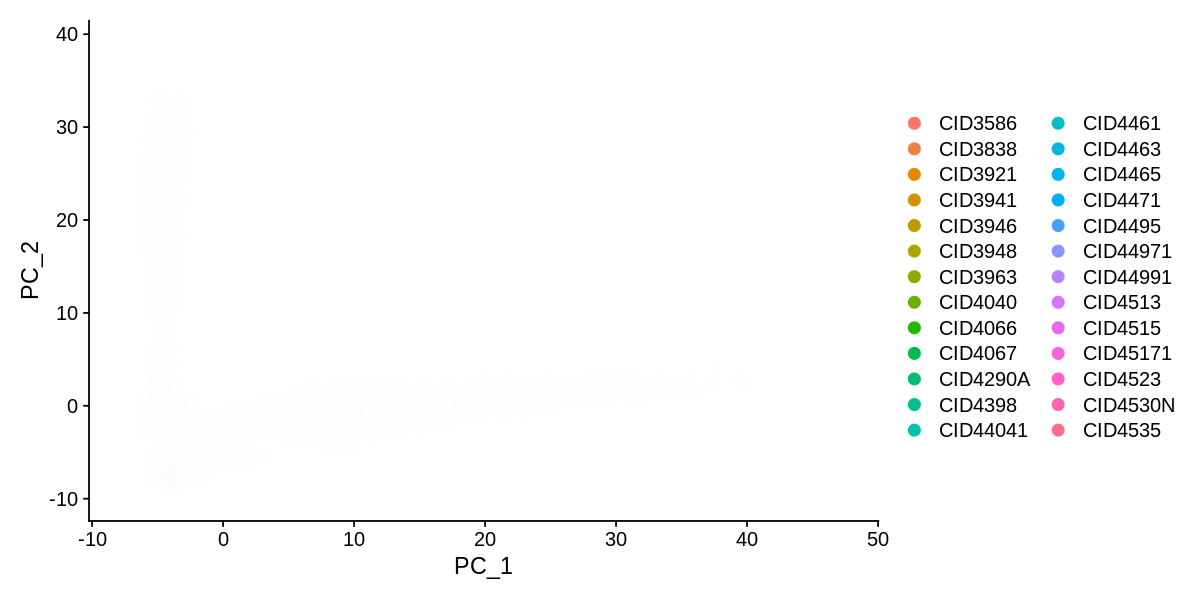

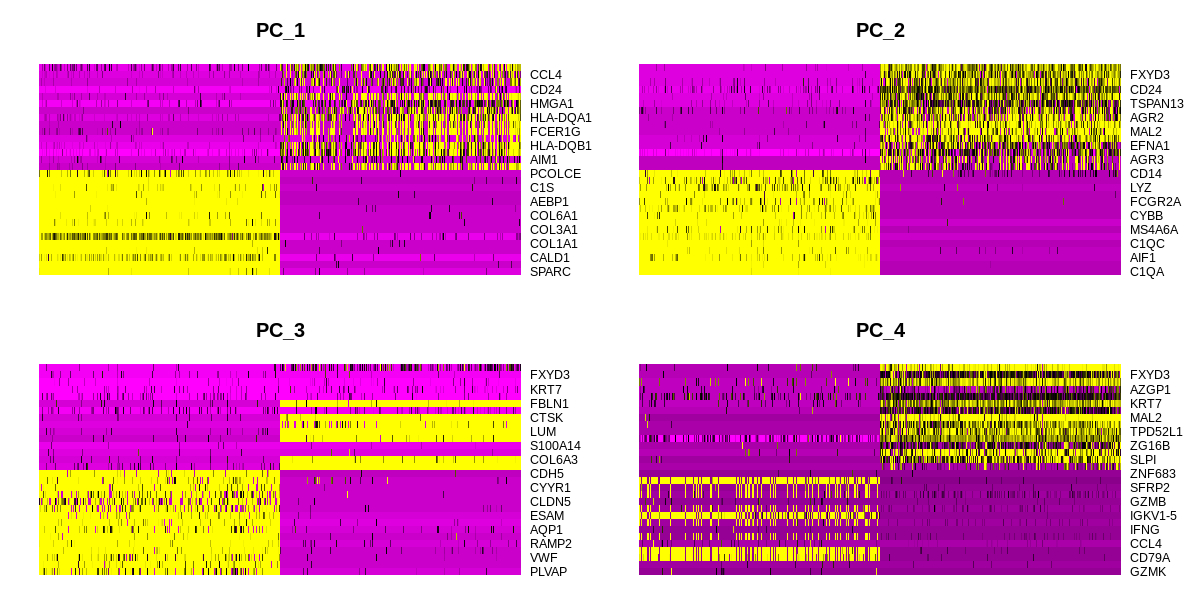

In [28]:
#seurat_integrated=ScaleData(seurat_integrated)


scRNA=ScaleData(scRNA)   
scRNA=RunPCA(object= scRNA,npcs = 100,pc.genes=VariableFeatures(object = scRNA))     
#pdf(file="05.pcaGene.pdf",width=10,height=8)
VizDimLoadings(object = scRNA, dims = 1:4, reduction = "pca",nfeatures = 20)
#dev.off()


#pdf(file="05.PCA.pdf",width=6.5,height=6)
DimPlot(object = scRNA, reduction = "pca")
#dev.off()

#pdf(file="05.pcaHeatmap.pdf",width=10,height=8)
DimHeatmap(object = scRNA, dims = 1:4, cells = 500, balanced = TRUE,nfeatures = 30,ncol=2)
#dev.off()

#seurat_integrated <- JackStraw(object = scRNA, num.replicate = 100)
#seurat_integrated <- ScoreJackStraw(object = scRNA, dims = 1:20)
#pdf(file="05.pcaJackStraw.pdf",width=8,height=6)
#JackStrawPlot(object = seurat_integrated, dims = 1:20)
#dev.off()

PC_ 1 
Positive:  SPARC, COL1A2, CALD1, COL6A2, COL1A1 
Negative:  ITGB2, CCL4, GPR183, CD24, TYROBP 
PC_ 2 
Positive:  C1QA, C1QB, AIF1, CD68, C1QC 
Negative:  AZGP1, FXYD3, KRT7, CD24, TACSTD2 
PC_ 3 
Positive:  PLVAP, EMCN, VWF, ADGRL4, RAMP2 
Negative:  CRABP2, FXYD3, CD24, KRT7, AZGP1 
PC_ 4 
Positive:  GZMK, CCR7, CD79A, MZB1, CCL4 
Negative:  TACSTD2, FXYD3, S100A16, AZGP1, TSPAN13 
PC_ 5 
Positive:  AGR3, ANKRD30A, AGR2, C1orf64, ESR1 
Negative:  UBE2C, BIRC5, KLK6, C6orf15, KRT6B 
PC_ 6 
Positive:  MMP2, CTHRC1, SFRP2, LUM, FBLN2 
Negative:  NDUFA4L2, RGS5, COX4I2, PPP1R14A, ACTA2 
PC_ 7 
Positive:  SAA1, KRT14, KRT6B, KRT5, KLK6 
Negative:  IGKV1-9, IGKV3-15, IGKV3-20, IGKV3-11, IGKV4-1 
PC_ 8 
Positive:  IGKV1-9, MZB1, DERL3, IGKV3-15, IGHG1 
Negative:  UBE2C, MKI67, TOP2A, NUSAP1, CDK1 
PC_ 9 
Positive:  TFAP2B, TMC5, MUCL1, LINC01285, CLCA2 
Negative:  DHRS2, TRH, DNAJC12, MRPL12, IGKC 
PC_ 10 
Positive:  S100A8, S100P, SERPINB3, KRT6A, S100A7 
Negative:  SFRP1, APOD, GABR

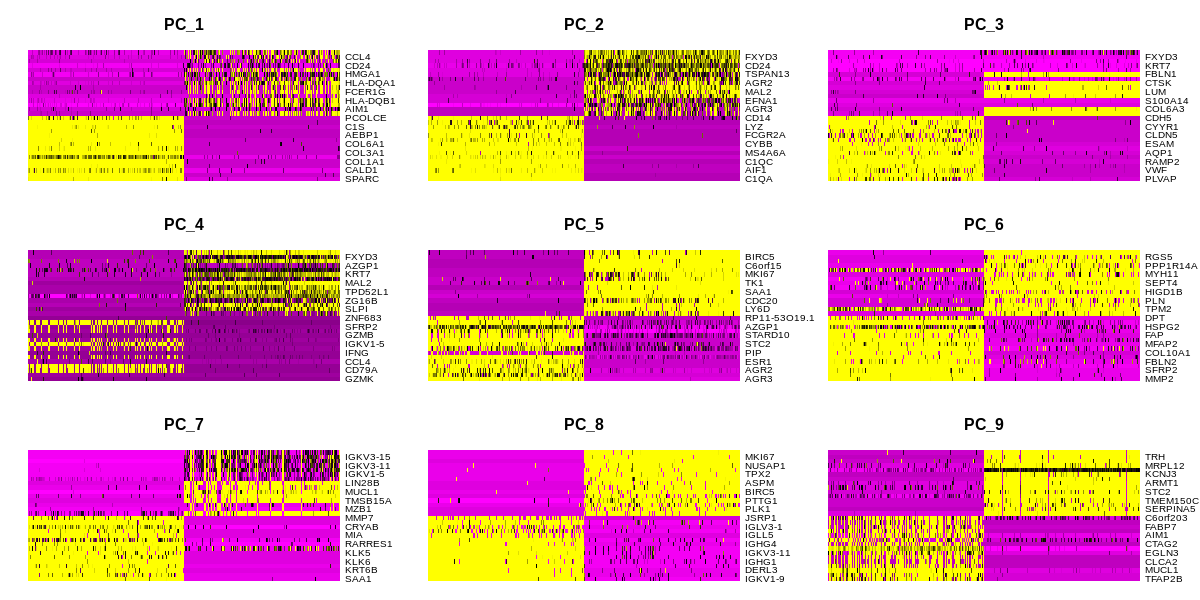

In [30]:
# Explore heatmap of PCs
#pdf('06.heatmap_of_PCs.pdf')
DimHeatmap(scRNA, 
           dims = 1:9, 
           cells = 500, 
           balanced = TRUE)
#dev.off()


# Printing out the most variable genes driving PCs
print(x = scRNA[["pca"]], 
      dims = 1:10, 
      nfeatures = 5)


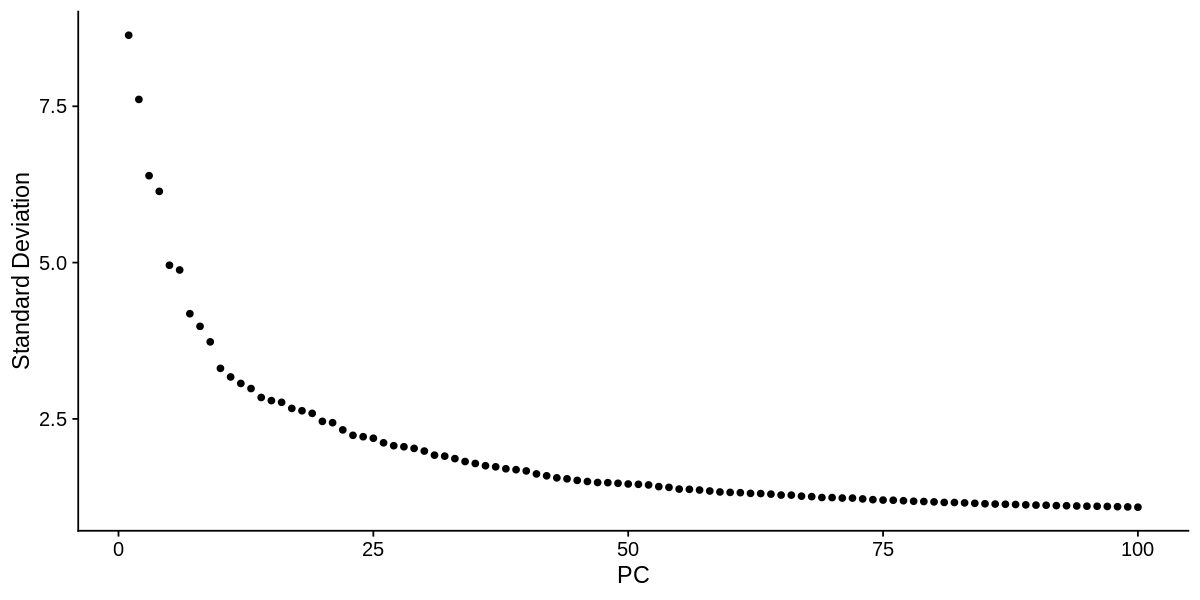

In [31]:
#pdf('07.elbowplot_of_PCs.pdf')
# Plot the elbow plot
ElbowPlot(object = scRNA, 
          ndims = 100)
#dev.off()


In [32]:
#Based on this plot, we could roughly determine the majority of the variation by where the elbow occurs around PC8 - PC10

# Determine the K-nearest neighbor graph
scRNA <- FindNeighbors(object = scRNA, 
                                dims = 1:100)
                                
# Determine the clusters for various resolutions                                
scRNA <- FindClusters(object = scRNA,
                               resolution = c( 0.8))

# Explore resolutions
scRNA@meta.data %>% 
        View()

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100064
Number of edges: 4799985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9451
Number of communities: 51
Elapsed time: 49 seconds


2 singletons identified. 49 final clusters.



orig.ident nCount_RNA nFeature_RNA percent.mito
CID3586_AAGACCTCAGCATGAG CID3586    4581       1689         1.506221    
CID3586_AAGGTTCGTAGTACCT CID3586    1726        779         5.793743    
CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514         1.383238    
⋮                        ⋮          ⋮          ⋮            ⋮           
CID4398_TGCCCATGTTACGGAG CID4398    5117        870         2.208325    
CID4398_TTGAACGTCCTATTCA CID4398    6679       1231         2.126067    
                         subtype celltype_subset     celltype_minor   
CID3586_AAGACCTCAGCATGAG HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_AAGGTTCGTAGTACCT HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_ACCAGTAGTTGTGGCC HER2+   Endothelial ACKR1   Endothelial ACKR1
⋮                        ⋮       ⋮                   ⋮                
CID4398_TGCCCATGTTACGGAG ER+     Myeloid_c0_DC_LAMP3 DCs              
CID4398_TTGAACGTCCTATTCA ER+     Myeloid_c0_DC_LAMP3 DCs              
                         celltype_major RNA_snn_res.0.8 seurat_clusters
CID3586_AAGACCTCAGCATGAG Endothelial    2               2              
CID3586_AAGGTTCGTAGTACCT Endothelial    2               2              
CID3586_ACCAGTAGTTGTGGCC Endothelial    2               2              
⋮                        ⋮              ⋮               ⋮              
CID4398_TGCCCATGTTACGGAG Myeloid        4               4              
CID4398_TTGAACGTCCTATTCA Myeloid        4               4

In [33]:
# Assign identity of clusters
Idents(object = scRNA) <- "RNA_snn_res.0.8"

# Plot the UMAP
scRNA <- RunUMAP(scRNA, dims =1:100)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:50:45 UMAP embedding parameters a = 0.9922 b = 1.112

15:50:45 Read 100064 rows and found 100 numeric columns

15:50:45 Using Annoy for neighbor search, n_neighbors = 30

15:50:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:51:11 Writing NN index file to temp file /tmp/Rtmpck2Ae4/file3776956b4a943

15:51:11 Searching Annoy index using 1 thread, search_k = 3000

15:51:59 Annoy recall = 100%

15:52:01 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbo

In [34]:
scRNA@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 100 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$umap
A dimensional reduction object with key UMAP_ 
 Number of dimensions: 2 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


In [35]:
scRNA@assays$RNA@data

  [[ suppressing 32 column names ‘CID3586_AAGACCTCAGCATGAG’, ‘CID3586_AAGGTTCGTAGTACCT’, ‘CID3586_ACCAGTAGTTGTGGCC’ ... ]]

  [[ suppressing 32 column names ‘CID3586_AAGACCTCAGCATGAG’, ‘CID3586_AAGGTTCGTAGTACCT’, ‘CID3586_ACCAGTAGTTGTGGCC’ ... ]]

  [[ suppressing 32 column names ‘CID3586_AAGACCTCAGCATGAG’, ‘CID3586_AAGGTTCGTAGTACCT’, ‘CID3586_ACCAGTAGTTGTGGCC’ ... ]]



27719 x 100064 sparse Matrix of class "dgCMatrix"
                                                                                        
RP11-34P13.7     .        .        .        .        .        .        .        .       
FO538757.3       .        .        .        .        .        .        .        .       
FO538757.2       .        .        .        .        .        .        .        .       
AP006222.2       .        .        .        .        .        .        .        .       
RP4-669L17.10    .        .        .        .        .        .        .        .       
RP5-857K21.4     .        .        .        .        .        .        .        .       
RP11-206L10.9    .        .        .        .        .        .        .        .       
LINC00115        .        .        .        .        .        .        .        .       
FAM41C           .        .        .        .        .        .        .        .       
RP11-54O7.3      .        .        .        .        .      

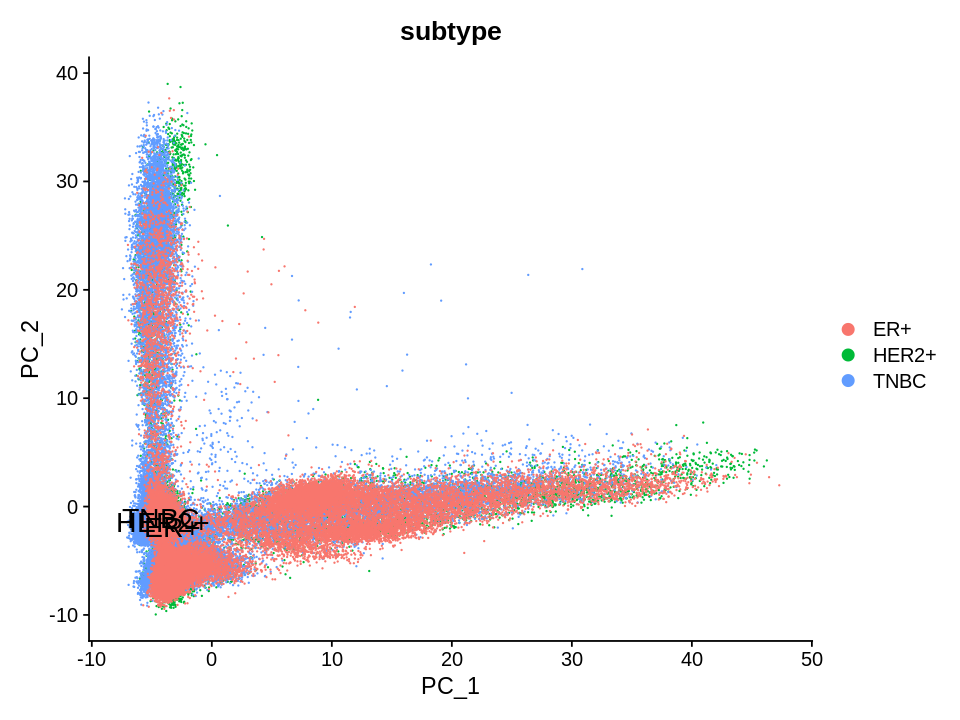

In [36]:
#pdf('08.pca_of_cell.pdf')
options(repr.plot.width=8,repr.plot.height=6)
DimPlot(scRNA,
        reduction = "pca",
        label = TRUE,
        group.by = "subtype",
        label.size = 6,
        raster=FALSE)
#dev.off()

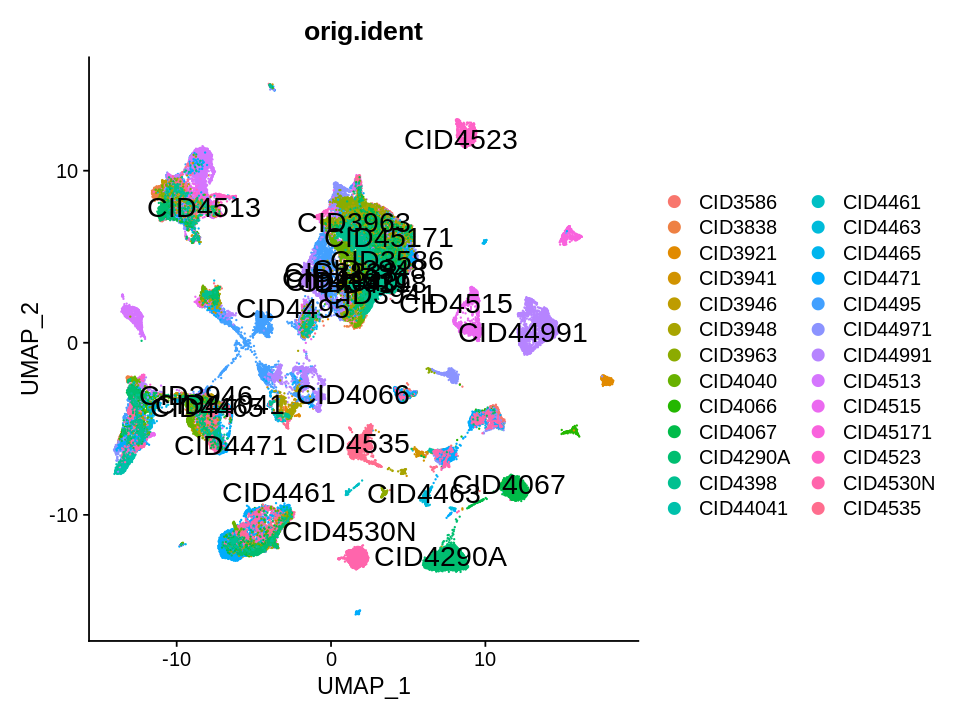

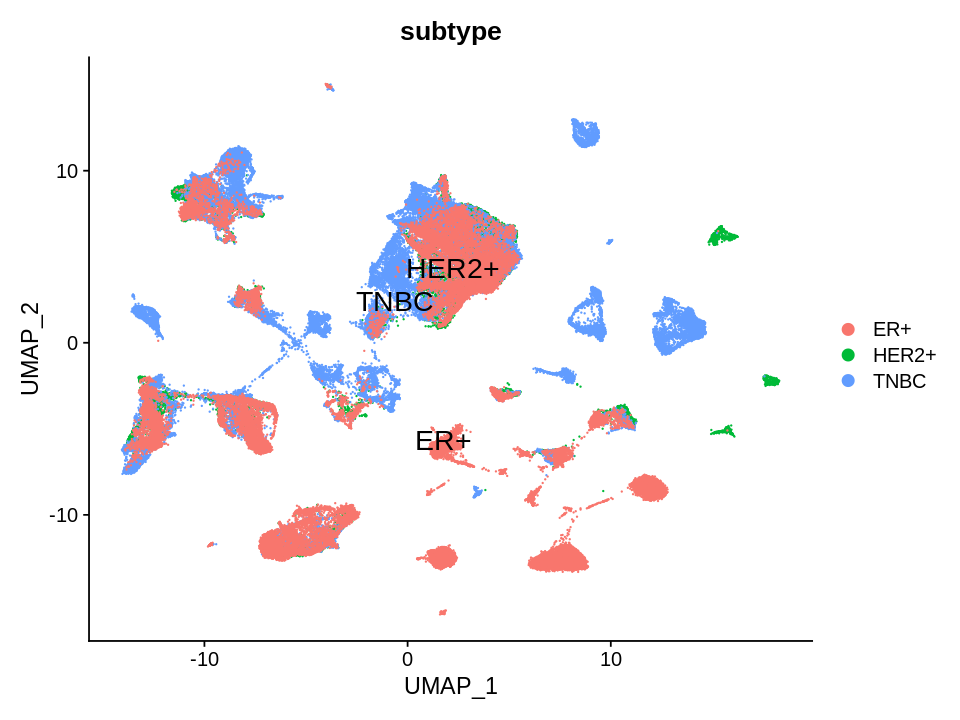

In [37]:
## Calculation of UMAP
## DO NOT RUN (calculated in the last lesson)


#pdf('09.umap_of_cell.pdf')
DimPlot(scRNA,
        reduction = "umap",
        group.by = "orig.ident",
        label = TRUE,
        label.size = 6, 
        raster=FALSE)

DimPlot(scRNA,
        reduction = "umap",
        group.by = "subtype",
        label = TRUE,
        label.size = 6,
        raster=FALSE)

#dev.off()


In [38]:
meta

sample   geo_accession clinical_subtype patient             
1  CID3586  GSM5354513    HER2+/ER+        Primary Breast Tumor
2  CID3838  GSM5354514    HER2+            Primary Breast Tumor
3  CID3921  GSM5354515    HER2+            Primary Breast Tumor
⋮  ⋮        ⋮             ⋮                ⋮                   
25 CID4530N GSM5354537    ER+              Primary Breast Tumor
26 CID4535  GSM5354538    ER+              Primary Breast Tumor

In [39]:
meta$sample

[1] "CID3586"  "CID3838"  "CID3921"  "CID3941"  "CID3946"  "CID3948" 
 [7] "CID3963"  "CID4040"  "CID4066"  "CID4067"  "CID4290A" "CID4398" 
[13] "CID44041" "CID4461"  "CID4463"  "CID4465"  "CID4471"  "CID4495" 
[19] "CID44971" "CID44991" "CID4513"  "CID4515"  "CID45171" "CID4523" 
[25] "CID4530N" "CID4535"

In [40]:
meta$Cancer_Type <- c("IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","IDC","ILC","IDC",
                      "IDC","IDC","MBC","IDC","IDC","MBC","IDC","ILC")
meta$Grade <- c("3","3","3","2","3","3","3","3","2","2","2","3","3","2","2","3","2","3","3","3","3","3","3","3","2","2")
meta$Treatment <- c("Naïve","Naïve","Naïve","Naïve","Naïve","Naïve","Treated","Naïve","Treated","Naïve","Naïve","Treated","Naïve",
                    "Naïve","Naïve","Naïve","Naïve","Naïve","Naïve","Naïve","Treated","Naïve","Naïve","Treated","Naïve","Naïve")
meta$TreatInfo <- c("-","-","-","-","-","-","AC, Paclitaxel, Herceptin (administered for Dx 3 years prior)","-","Neoadjuvant AC",
                    "-","-","Neoadjuvant FEC-D","-","-","-","-","-","-","-","-","Neoadjuvant AC (4x), Paclitaxel (3x)","-","-",
                    "Neoadjuvant AC (4x), Paclitaxel (1x)","-","-")

In [41]:
meta

sample   geo_accession clinical_subtype patient              Cancer_Type
1  CID3586  GSM5354513    HER2+/ER+        Primary Breast Tumor IDC        
2  CID3838  GSM5354514    HER2+            Primary Breast Tumor IDC        
3  CID3921  GSM5354515    HER2+            Primary Breast Tumor IDC        
⋮  ⋮        ⋮             ⋮                ⋮                    ⋮          
25 CID4530N GSM5354537    ER+              Primary Breast Tumor IDC        
26 CID4535  GSM5354538    ER+              Primary Breast Tumor ILC        
   Grade Treatment TreatInfo
1  3     Naïve     -        
2  3     Naïve     -        
3  3     Naïve     -        
⋮  ⋮     ⋮         ⋮        
25 2     Naïve     -        
26 2     Naïve     -

In [42]:
paste0(meta$sample, ";",meta$clinical_subtype)

[1] "CID3586;HER2+/ER+" "CID3838;HER2+"     "CID3921;HER2+"    
 [4] "CID3941;ER+"       "CID3946;TNBC"      "CID3948;ER+"      
 [7] "CID3963;ER+"       "CID4040;ER+"       "CID4066;HER2+/ER+"
[10] "CID4067;ER+"       "CID4290A;ER+"      "CID4398;ER+"      
[13] "CID44041;TNBC"     "CID4461;ER+"       "CID4463;ER+"      
[16] "CID4465;TNBC"      "CID4471;ER+"       "CID4495;TNBC"     
[19] "CID44971;TNBC"     "CID44991;TNBC"     "CID4513;TNBC"     
[22] "CID4515;TNBC"      "CID45171;HER2+"    "CID4523;TNBC"     
[25] "CID4530N;ER+"      "CID4535;ER+"

In [43]:
meta.3 <- meta[match(scRNA$orig.ident, meta$sample),]

In [44]:
scRNA$Cancer_Type <- meta.3$Cancer_Type
scRNA$Grade <- meta.3$Grade
scRNA$Treatment <- meta.3$Treatment
scRNA$TreatInfo <- meta.3$TreatInfo

In [45]:
scRNA@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mito
CID3586_AAGACCTCAGCATGAG CID3586    4581       1689         1.506221    
CID3586_AAGGTTCGTAGTACCT CID3586    1726        779         5.793743    
CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514         1.383238    
⋮                        ⋮          ⋮          ⋮            ⋮           
CID4398_TGCCCATGTTACGGAG CID4398    5117        870         2.208325    
CID4398_TTGAACGTCCTATTCA CID4398    6679       1231         2.126067    
                         subtype celltype_subset     celltype_minor   
CID3586_AAGACCTCAGCATGAG HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_AAGGTTCGTAGTACCT HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_ACCAGTAGTTGTGGCC HER2+   Endothelial ACKR1   Endothelial ACKR1
⋮                        ⋮       ⋮                   ⋮                
CID4398_TGCCCATGTTACGGAG ER+     Myeloid_c0_DC_LAMP3 DCs              
CID4398_TTGAACGTCCTATTCA ER+     Myeloid_c0_DC_LAMP3 DCs              
                         celltype_major RNA_snn_res.0.8 seurat_clusters
CID3586_AAGACCTCAGCATGAG Endothelial    2               2              
CID3586_AAGGTTCGTAGTACCT Endothelial    2               2              
CID3586_ACCAGTAGTTGTGGCC Endothelial    2               2              
⋮                        ⋮              ⋮               ⋮              
CID4398_TGCCCATGTTACGGAG Myeloid        4               4              
CID4398_TTGAACGTCCTATTCA Myeloid        4               4              
                         Cancer_Type Grade Treatment TreatInfo        
CID3586_AAGACCTCAGCATGAG IDC         3     Naïve     -                
CID3586_AAGGTTCGTAGTACCT IDC         3     Naïve     -                
CID3586_ACCAGTAGTTGTGGCC IDC         3     Naïve     -                
⋮                        ⋮           ⋮     ⋮         ⋮                
CID4398_TGCCCATGTTACGGAG IDC         3     Treated   Neoadjuvant FEC-D
CID4398_TTGAACGTCCTATTCA IDC         3     Treated   Neoadjuvant FEC-D

In [46]:
table(scRNA$subtype)


  ER+ HER2+  TNBC 
38241 19311 42512 

In [47]:
# For DR.CHEN
scRNA.allTNBC <- subset(scRNA, subset = subtype == 'TNBC')

In [48]:
table(paste0(scRNA.allTNBC$orig.ident, ':', scRNA.allTNBC$Treatment, ':', scRNA.allTNBC$subtype))


  CID3946:Naïve:TNBC CID3963:Treated:TNBC  CID44041:Naïve:TNBC 
                 774                 3527                 2131 
  CID4465:Naïve:TNBC   CID4495:Naïve:TNBC  CID44971:Naïve:TNBC 
                1564                 7985                 7986 
 CID44991:Naïve:TNBC CID4513:Treated:TNBC   CID4515:Naïve:TNBC 
                7023                 5619                 4149 
CID4523:Treated:TNBC 
                1754 

In [49]:
table(scRNA.allTNBC$Treatment)


  Naïve Treated 
  31612   10900 

In [50]:

scRNA.allTNBC.naive <- subset(scRNA.allTNBC, subset = Treatment == 'Naïve')

In [51]:
table(paste0(scRNA.allTNBC.naive$orig.ident, ':', scRNA.allTNBC.naive$Treatment, ':', scRNA.allTNBC.naive$subtype))


 CID3946:Naïve:TNBC CID44041:Naïve:TNBC  CID4465:Naïve:TNBC  CID4495:Naïve:TNBC 
                774                2131                1564                7985 
CID44971:Naïve:TNBC CID44991:Naïve:TNBC  CID4515:Naïve:TNBC 
               7986                7023                4149 

In [52]:
write_rds(scRNA.allTNBC,
          path = "./data_for_DrCHEN/scRNA.allTNBC.rds")  

write_rds(scRNA.allTNBC.naive,
          path = "./data_for_DrCHEN/scRNA.allTNBC.naive.rds")  


Warning message:
“The `path` argument of `write_rds()` is deprecated as of readr 1.4.0.
ℹ Please use the `file` argument instead.”


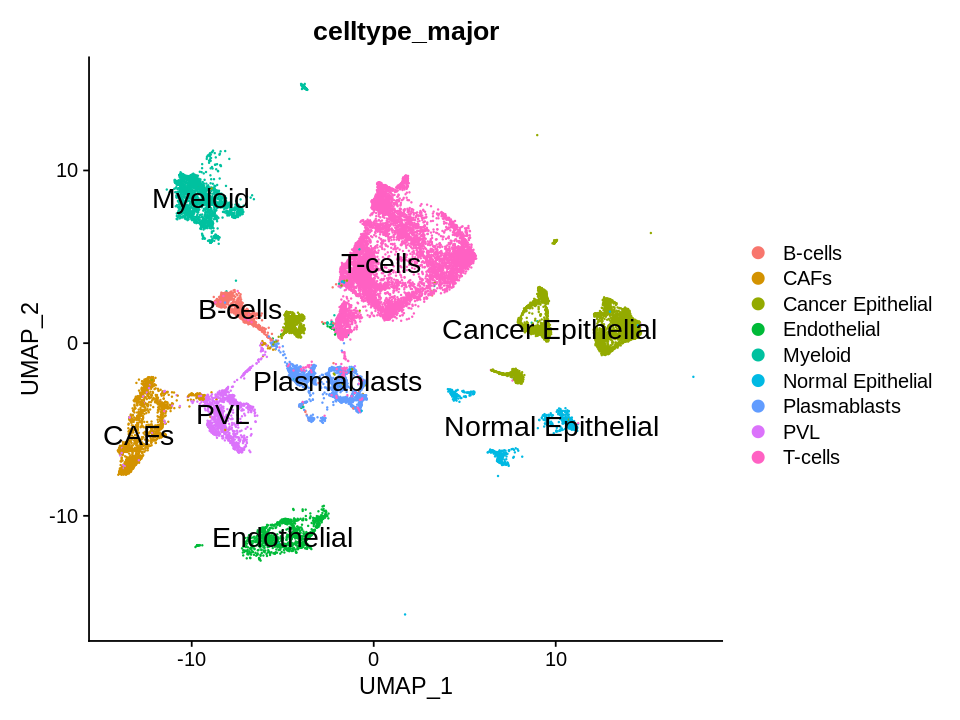

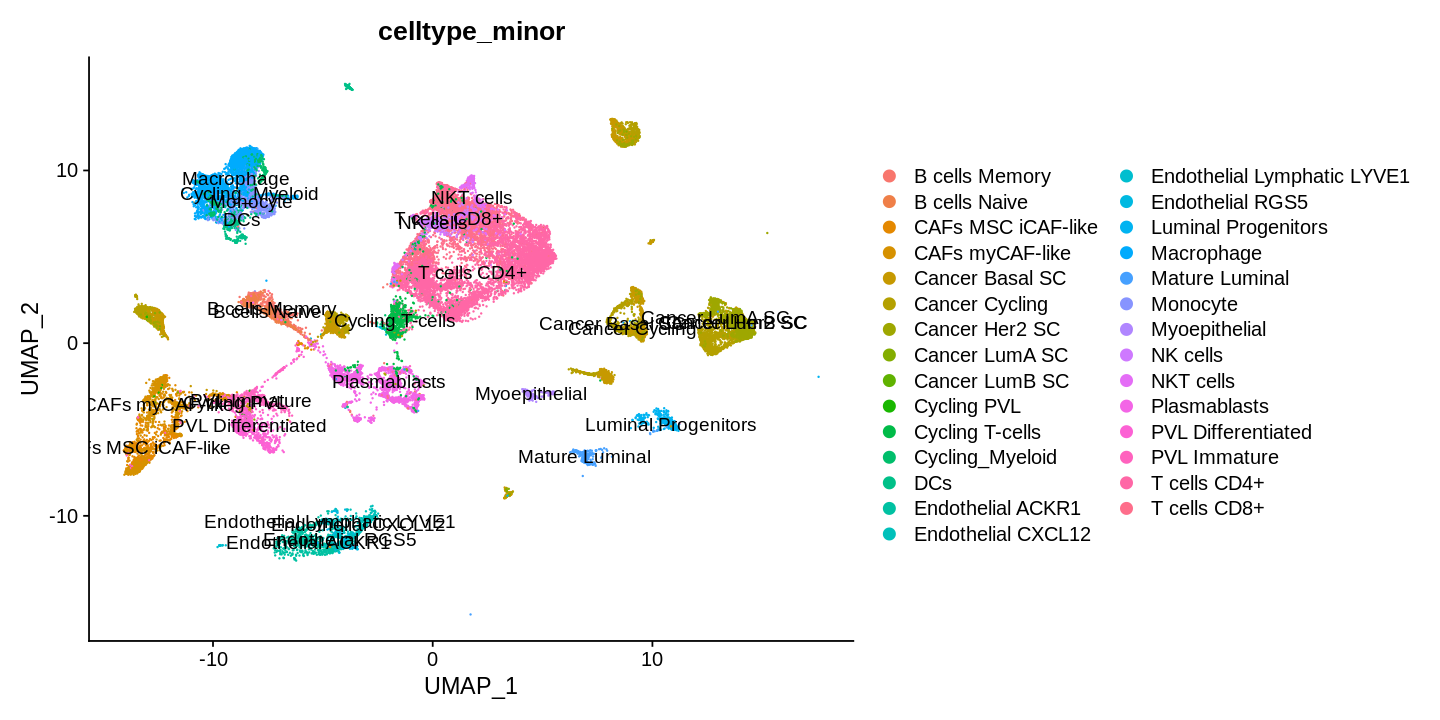

In [53]:
options(repr.plot.width=8,repr.plot.height=6)

DimPlot(scRNA.allTNBC.naive,
        reduction = "umap",
        group.by = "celltype_major",
        label = TRUE,
        label.size = 6,
        raster=FALSE)

options(repr.plot.width=12,repr.plot.height=6)

DimPlot(scRNA.allTNBC,
        reduction = "umap",
        group.by = "celltype_minor",
        label = TRUE,
        label.size = 4,
        raster=FALSE)

In [54]:
table(scRNA$celltype_major)
table(scRNA$celltype_minor)


          B-cells              CAFs Cancer Epithelial       Endothelial 
             3206              6573             24489              7605 
          Myeloid Normal Epithelial      Plasmablasts               PVL 
             9675              4355              3524              5423 
          T-cells 
            35214 


             B cells Memory               B cells Naive 
                       2581                         625 
         CAFs MSC iCAF-like             CAFs myCAF-like 
                       3153                        3420 
            Cancer Basal SC              Cancer Cycling 
                       4312                        5359 
             Cancer Her2 SC              Cancer LumA SC 
                       3708                        7742 
             Cancer LumB SC                 Cycling PVL 
                       3368                          50 
            Cycling T-cells             Cycling_Myeloid 
                       1528                         463 
                        DCs           Endothelial ACKR1 
                        955                        4611 
         Endothelial CXCL12 Endothelial Lymphatic LYVE1 
                       1644                         203 
           Endothelial RGS5         Luminal Progenitors 
                       1147   

In [55]:
scRNA@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mito
CID3586_AAGACCTCAGCATGAG CID3586    4581       1689         1.506221    
CID3586_AAGGTTCGTAGTACCT CID3586    1726        779         5.793743    
CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514         1.383238    
⋮                        ⋮          ⋮          ⋮            ⋮           
CID4398_TGCCCATGTTACGGAG CID4398    5117        870         2.208325    
CID4398_TTGAACGTCCTATTCA CID4398    6679       1231         2.126067    
                         subtype celltype_subset     celltype_minor   
CID3586_AAGACCTCAGCATGAG HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_AAGGTTCGTAGTACCT HER2+   Endothelial ACKR1   Endothelial ACKR1
CID3586_ACCAGTAGTTGTGGCC HER2+   Endothelial ACKR1   Endothelial ACKR1
⋮                        ⋮       ⋮                   ⋮                
CID4398_TGCCCATGTTACGGAG ER+     Myeloid_c0_DC_LAMP3 DCs              
CID4398_TTGAACGTCCTATTCA ER+     Myeloid_c0_DC_LAMP3 DCs              
                         celltype_major RNA_snn_res.0.8 seurat_clusters
CID3586_AAGACCTCAGCATGAG Endothelial    2               2              
CID3586_AAGGTTCGTAGTACCT Endothelial    2               2              
CID3586_ACCAGTAGTTGTGGCC Endothelial    2               2              
⋮                        ⋮              ⋮               ⋮              
CID4398_TGCCCATGTTACGGAG Myeloid        4               4              
CID4398_TTGAACGTCCTATTCA Myeloid        4               4              
                         Cancer_Type Grade Treatment TreatInfo        
CID3586_AAGACCTCAGCATGAG IDC         3     Naïve     -                
CID3586_AAGGTTCGTAGTACCT IDC         3     Naïve     -                
CID3586_ACCAGTAGTTGTGGCC IDC         3     Naïve     -                
⋮                        ⋮           ⋮     ⋮         ⋮                
CID4398_TGCCCATGTTACGGAG IDC         3     Treated   Neoadjuvant FEC-D
CID4398_TTGAACGTCCTATTCA IDC         3     Treated   Neoadjuvant FEC-D

In [56]:
scRNA.1 <- scRNA.allTNBC.naive
scRNA.1 <- NormalizeData(object = scRNA.1, normalization.method = "RC", scale.factor = 1e6)

scRNA.1@assays$RNA@data

  [[ suppressing 32 column names ‘CID44041_AAAGTAGTCCTAGGGC’, ‘CID44041_AACACGTCAACACCTA’, ‘CID44041_AACTTTCTCCTACAGA’ ... ]]

  [[ suppressing 32 column names ‘CID44041_AAAGTAGTCCTAGGGC’, ‘CID44041_AACACGTCAACACCTA’, ‘CID44041_AACTTTCTCCTACAGA’ ... ]]

  [[ suppressing 32 column names ‘CID44041_AAAGTAGTCCTAGGGC’, ‘CID44041_AACACGTCAACACCTA’, ‘CID44041_AACTTTCTCCTACAGA’ ... ]]



27719 x 31612 sparse Matrix of class "dgCMatrix"
                                                                                      
RP11-34P13.7        .         .         .         .         .         .         .     
FO538757.3          .         .         .         .         .         .         .     
FO538757.2          .         .         .         .         .         .         .     
AP006222.2          .         .         .         .         .         .         .     
RP4-669L17.10       .         .         .         .         .         .         .     
RP5-857K21.4        .         .         .         .         .         .         .     
RP11-206L10.9       .         .         .         .         .         .         .     
LINC00115           .         .         .         .         .         .         .     
FAM41C              .         .         .         .         .         .         .     
RP11-54O7.3         .         .         .         .         .         .         .

In [57]:
c("ENPP1","MB21D1","TMEM173","LRRC8A","ABCC1","SLC19A1","SLC46A2") %in% rownames(scRNA.1@assays$RNA@data)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [58]:
#ISG gene
ISG <- read.table("./ISGgene.txt",head=F)
ISG <- ISG$V1
ISG

[1] "ADAR"    "DDX60"   "HERC6"   "IRF7"    "OASL"    "PSME2"   "STAT2"  
 [8] "TRIM25"  "BST2"    "DHX58"   "IFI35"   "ISG15"   "OGFR"    "RSAD2"  
[15] "TDRD7"   "UBE2L6"  "CASP1"   "EIF2AK2" "IFIH1"   "ISG20"   "PARP12" 
[22] "RTP4"    "TRAFD1"  "USP18"   "CMPK2"   "EPSTI1"  "IFIT2"   "MX1"    
[29] "PARP14"  "SAMD9L"  "TRIM14"  "CXCL10"  "GBP4"    "IFIT3"   "NMI"    
[36] "PNPT1"   "SP110"   "TRIM21"  "HERC5"   "EPSTI1"  "CMPK2"

In [59]:
table(ISG %in% rownames(scRNA.1@assays$RNA@data))


TRUE 
  41 

In [60]:
celltype_myeloid_1 <- names(table(subset(scRNA.1, subset = celltype_major == "Myeloid")$celltype_minor))
celltype_myeloid_1

[1] "Cycling_Myeloid" "DCs"             "Macrophage"      "Monocyte"

In [61]:
celltype_myeloid_2 <- names(table(subset(scRNA.1, subset = celltype_major == "Myeloid")$celltype_subset))
celltype_myeloid_2

[1] "Cycling_Myeloid"                "Myeloid_c0_DC_LAMP3"           
 [3] "Myeloid_c1_LAM1_FABP5"          "Myeloid_c10_Macrophage_1_EGR1" 
 [5] "Myeloid_c11_cDC2_CD1C"          "Myeloid_c12_Monocyte_1_IL1B"   
 [7] "Myeloid_c2_LAM2_APOE"           "Myeloid_c3_cDC1_CLEC9A"        
 [9] "Myeloid_c4_DCs_pDC_IRF7"        "Myeloid_c7_Monocyte_3_FCGR3A"  
[11] "Myeloid_c8_Monocyte_2_S100A9"   "Myeloid_c9_Macrophage_2_CXCL10"

In [213]:
table(Idents(object = scRNA.1) )


             Endothelial ACKR1               Endothelial RGS5 
                           597                            192 
            Endothelial CXCL12          CAFs MSC iCAF-like s1 
                           263                            724 
         CAFs MSC iCAF-like s2          CAFs Transitioning s3 
                           504                            169 
            CAFs myCAF like s4             CAFs myCAF like s5 
                           394                            682 
         PVL Differentiated s3                PVL_Immature s2 
                           675                            188 
               PVL Immature s1    Endothelial Lymphatic LYVE1 
                           264                             64 
                B cells Memory          T_cells_c4_CD8+_ZFP36 
                          1349                            956 
              T_cells_c6_IFIT1           T_cells_c7_CD8+_IFNG 
                           538                        

In [246]:
celltype_myeloid_2

[1] "Cycling_Myeloid"                "Myeloid_c0_DC_LAMP3"           
 [3] "Myeloid_c1_LAM1_FABP5"          "Myeloid_c10_Macrophage_1_EGR1" 
 [5] "Myeloid_c11_cDC2_CD1C"          "Myeloid_c12_Monocyte_1_IL1B"   
 [7] "Myeloid_c2_LAM2_APOE"           "Myeloid_c3_cDC1_CLEC9A"        
 [9] "Myeloid_c4_DCs_pDC_IRF7"        "Myeloid_c7_Monocyte_3_FCGR3A"  
[11] "Myeloid_c8_Monocyte_2_S100A9"   "Myeloid_c9_Macrophage_2_CXCL10"

#### For manu figures 

`summarise()` has grouped output by 'Group', 'Patient'. You can override using the `.groups` argument.


[1] 117.8134
[1] 1


`geom_smooth()` using formula = 'y ~ x'


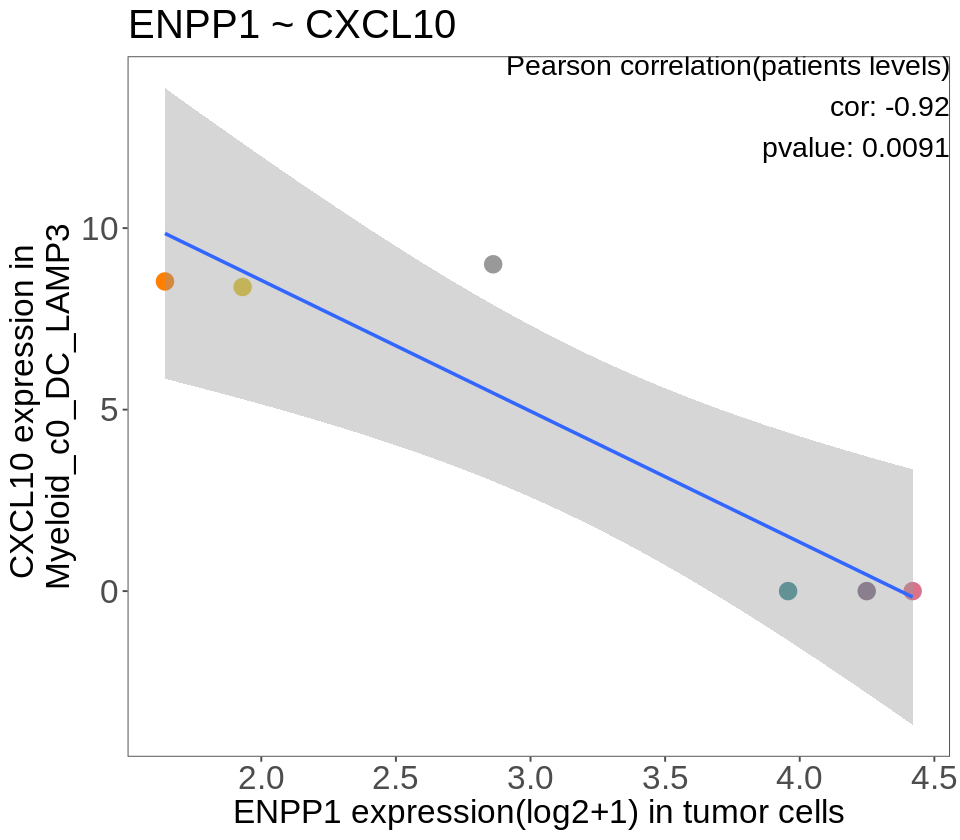

In [81]:
options(repr.plot.width=8,repr.plot.height=7,warn = -1)


seurat_integrated_antiPD1 <- scRNA.1 #subset(x = seurat_integrated, subset = Response == "SD" | Response == "PR")
seurat_integrated_antiPD1_cell <- seurat_integrated_antiPD1 #subset(seurat_integrated_antiPD1,idents = c(celltype))

#isg.exp <- apply(t(as.data.frame(seurat_integrated_antiPD1_cell@assays$RNA@data[unique(ISG),])),1,mean)
res <- data.frame(
            Group = seurat_integrated_antiPD1_cell$Cancer_Type,
            Patient = seurat_integrated_antiPD1_cell$orig.ident,
            exp=as.numeric(seurat_integrated_antiPD1_cell@assays$RNA@data[c("ENPP1"),]),
            celltype = seurat_integrated_antiPD1_cell$celltype_major)

res <- subset(res, subset = celltype %in% c("CAFs", "Cancer Epithelial", "PVL", "Normal Epithelial"))

#res <- subset(res, subset = celltype %in% c("CAFs", "Cancer Epithelial", "PVL"))
res$celltype_1 <- "Tumor cells"


res.1 <- data.frame(
            Group = seurat_integrated_antiPD1_cell$Cancer_Type,
            Patient = seurat_integrated_antiPD1_cell$orig.ident,
            exp=as.numeric(seurat_integrated_antiPD1_cell@assays$RNA@data[c("CXCL10"),]),
            celltype = seurat_integrated_antiPD1_cell$celltype_subset)

#res.1 <- subset(res.1, subset = celltype %in% celltype_myeloid_2)
res.1$celltype_1 <- res.1$celltype

res <- rbind(res,res.1)

#dat.s <- subset(res,subset = exp != 0)
dat.s <- res

dat.s.1 <- dat.s %>% dplyr::group_by(Group,Patient,celltype_1) %>% dplyr::summarise(mean_exp = mean(exp)) %>% ungroup()
dat.s.1.m <- melt(dat.s.1,id.var = c('Group','Patient','celltype_1'))
#dat.s.1.m$Group <- factor(dat.s.1.m$Group, levels = c( 'peritumoral' ,'tumor'))

dat.s.1.m.s <- spread(dat.s.1.m, celltype_1,value)

#head(dat.s)
ylim1<- boxplot.stats(dat.s$exp[dat.s$exp!= 0])$stats[2]
print(ylim1)
#my_comparisons <- list(c('Normal','Tumor'))

ylim2 <- 130

colourCount = length(unique(dat.s$Patient))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

#print(dat.s.1.m)
#print(dat.s.2.m.p)

#for(i in 4:(ncol(dat.s.1.m.s)-1)){
for(i in which(names(dat.s.1.m.s) == 'Myeloid_c0_DC_LAMP3')){
re.tt = tryCatch(
     {
        a <- cor.test(log2(dat.s.1.m.s$`Tumor cells`+1), log2(dat.s.1.m.s[,i] +1)) # exp plot
        data.frame(cor = as.character(round(a$estimate,2)), pvalue = as.character(format.pval(a$p.value, digits = 2)))

      }, error = function(e){
         data.frame(cor = "NA", pvalue = "NA")
      }, finnaly = {
    print(1) #是啥都行。我用来输出循环信息
      }
   )
p <- ggplot(dat.s.1.m.s, 
       aes(x=log2(`Tumor cells`+1), y = log2(dat.s.1.m.s[,i] +1)))+  # Create ggplot without outliers
  #geom_boxplot(aes(color = Patient)) +#+#outlier.shape = NA)# +
 #geom_jitter(aes(color = Patient), width =0.2,size=2.5)+
    geom_point(aes(color =  Patient,size = 5))+ geom_smooth(method = "lm")+
 #scale_shape_manual(values = c(2))+
 scale_color_manual(values = colorRampPalette(brewer.pal(12, "Set1"))(colourCount)) +
#geom_line(aes(group=Patient), color="black")+#, alpha=0.8) +
#coord_cartesian(ylim = c(0,ylim2))+
  #coord_cartesian(ylim = quantile(as.numeric(value), c(0.1, 0.9)))
 # scale_fill_manual(values = colorRampPalette(brewer.pal(12, "Dark1"))(colourCount)) +
#stat_boxplot(geom="errorbar",width=0.15,aes(color=response))+
#geom_boxplot(varwidth = TRUE)+

#facet_wrap(.~Group ,scales = "free", drop = F)+

geom_text(data=re.tt,aes(x = Inf, y = Inf,label=paste0("Pearson correlation(patients levels)\ncor: ",
                                                       cor, "\n",
                                                       "pvalue: ",
                                                       pvalue)
                                                          ),
                               inherit.aes = FALSE,hjust ="inward", vjust ="inward", size = 6)+

#geom_text(data=dat.s.2.m.p,aes(x = Inf, y = Inf,label=paste0("All cells Wilconxon: ",as.character(format.pval(p.value, digits = 2)))),
#                               inherit.aes = FALSE,hjust ="inward", vjust ="inward")+
    
    

  #theme_classic() +
#theme_bw()+
#theme_par()+
theme_few()+
  labs(x="ENPP1 expression(log2+1) in tumor cells", y= paste0("CXCL10 expression in \n",colnames(dat.s.1.m.s)[i])) +
#  ggtitle(paste0(celltype,"\n", Marker))+
    ggtitle(paste0("ENPP1 ~ CXCL10"))+
 theme(legend.position="none")+
  #theme(legend.position="none")+
  #scale_y_continuous(expand = c(0.0,0.0),sec.axis = sec_axis(~ . * 1.0, name = 'XJU (DAF)'))+
  #scale_y_continuous(expand = c(0,40000),sec.axis = sec_axis(~ . * 1.0, name = ''))+
  #scale_x_continuous(limits = c(0, 40000))+
  #scale_y_continuous(limits = c(0, 40000))+
  #xlim(0, 2500) + ylim(0, 2500)+
  theme(panel.grid = element_blank())+
    theme(axis.text.x = element_text(size = 20,angle = 0,hjust = 0.5), axis.text.y = element_text(size = 20)) +
    theme(axis.title.x = element_text(size = 20), axis.title.y = element_text(size = 20))+ 
    theme(title = element_text(size = 20))+
 theme(strip.text.x = element_text(size = 20), strip.text.y = element_text(size = 20))

#scale_x_continuous(expand = c(0.0,0.0))
#stat_compare_means(comparisons = my_comparisons)#+#不同组间的比较
#stat_compare_means(label.x = 1.2)
    


print(p)

} 

In [83]:
res

Group Patient  Cycling_Myeloid Myeloid_c0_DC_LAMP3 Myeloid_c1_LAM1_FABP5
1 IDC   CID3946  0.0038759690             NA         0.13565891           
2 IDC   CID44041 0.0009385265    0.001877053         0.01032379           
3 IDC   CID4465  0.0134271100    0.001278772         0.06713555           
⋮ ⋮     ⋮        ⋮               ⋮                   ⋮                    
6 IDC   CID44991 0.0004271679    0.0005695572        0.006834686          
7 IDC   CID4515  0.0072306580    0.0016871535        0.031091829          
  Myeloid_c10_Macrophage_1_EGR1 Myeloid_c11_cDC2_CD1C
1           NA                           NA          
2 0.0154856875                  0.005161896          
3 0.0006393862                  0.001918159          
⋮ ⋮                             ⋮                    
6 0.006407518                   0.001139114          
7 0.014702338                   0.004338395          
  Myeloid_c12_Monocyte_1_IL1B Myeloid_c2_LAM2_APOE Myeloid_c3_cDC1_CLEC9A
1 0.056847545                 0.0038759690                   NA          
2 0.004223369                 0.0042233693         0.0009385265          
3 0.021099744                 0.0006393862         0.0019181586          
⋮ ⋮                           ⋮                    ⋮                     
6 0.003274954                 0.004556457          0.0008543358          
7 0.016148470                 0.013738250          0.0012051097          
  Myeloid_c4_DCs_pDC_IRF7 Myeloid_c7_Monocyte_3_FCGR3A
1 0.0025839793                      NA                
2 0.0009385265            0.0004692633                
3 0.0025575448                      NA                
⋮ ⋮                       ⋮                           
6 0.0007119465                      NA                
7 0.0079537238            0.0009640877                
  Myeloid_c8_Monocyte_2_S100A9 Myeloid_c9_Macrophage_2_CXCL10 Tumor cells
1          NA                            NA                    2.50849   
2 0.003754106                  0.0009385265                   14.52761   
3 0.001918159                  0.0031969309                   18.01178   
⋮ ⋮                            ⋮                              ⋮          
6 0.001708672                  0.002847786                    20.398062  
7 0.029645698                  0.006989636                     6.266621

`summarise()` has grouped output by 'Group', 'Patient'. You can override using the `.groups` argument.


[1] 117.8134
[1] 1


`geom_smooth()` using formula = 'y ~ x'


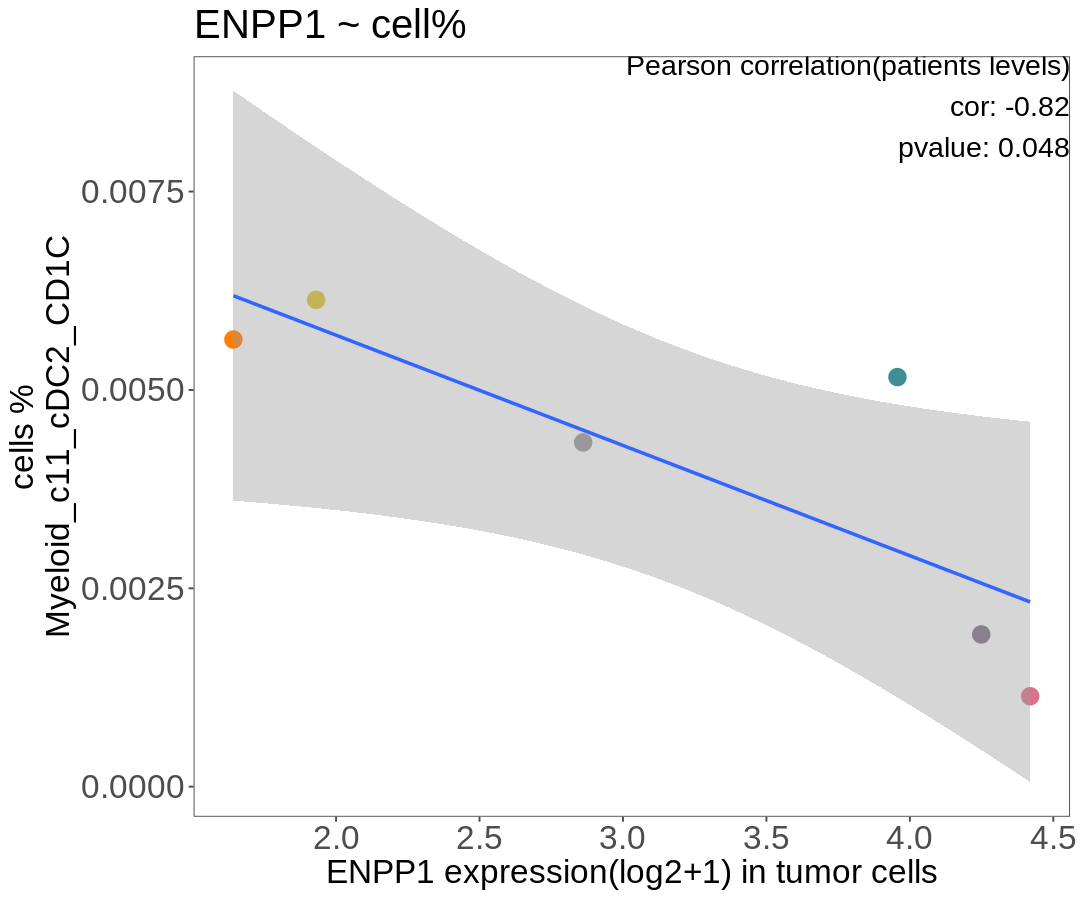

In [91]:

options(repr.plot.width = 9,repr.plot.height=7.5,warn = -1)

seurat_integrated_antiPD1 <- scRNA.1 #subset(x = seurat_integrated, subset = Response == "SD" | Response == "PR")
seurat_integrated_antiPD1_cell <- seurat_integrated_antiPD1 #subset(seurat_integrated_antiPD1,idents = c(celltype))


res <- data.frame(
            Group = seurat_integrated_antiPD1_cell$Cancer_Type,
            Patient = seurat_integrated_antiPD1_cell$orig.ident,
            exp=as.numeric(seurat_integrated_antiPD1_cell@assays$RNA@data[c("ENPP1"),]),
            celltype = seurat_integrated_antiPD1_cell$celltype_major)

res <- subset(res, subset = celltype %in% c("CAFs", "Cancer Epithelial", "PVL", "Normal Epithelial"))

#print(head(res))
res$celltype <- "Tumor cells"
res.0 <- res
res.0 <- res.0 %>% dplyr::group_by(Group,Patient,celltype) %>% dplyr::summarise(mean_exp = mean(exp)) %>% ungroup()



res <- data.frame(
            Group = seurat_integrated_antiPD1_cell$Cancer_Type,
            Patient = seurat_integrated_antiPD1_cell$orig.ident,
            #exp=as.numeric(seurat_integrated_antiPD1_cell@assays$RNA@data[c("ENPP1"),]),
            celltype = seurat_integrated_antiPD1_cell$celltype_subset)


res.1 <- res  %>%  
    dplyr::group_by(Group,Patient) %>% 
    count(celltype)

res.2 <- res  %>%  
    dplyr::group_by(Group) %>% 
    count(Patient)

res.3 <- merge(res.1, res.2, by= c("Group","Patient"))
res.3$p.x <- res.3$n.x/res.3$n.y

res.4 <- subset(res.3, subset = celltype %in% celltype_myeloid_2
               )

res.5 <- res.4[,c(1,2,3,6)]


colnames(res.5) <- c("Group","Patient","celltype","value")
colnames(res.0) <- c("Group","Patient","celltype","value")

res <- rbind(res.5, res.0)

res <- spread(res, celltype,value)

#dat.s.1 <- dat.s %>% dplyr::group_by(Group,Patient,celltype_1) %>% dplyr::summarise(mean_exp = mean(exp)) %>% ungroup()
#dat.s.1.m <- melt(dat.s.1,id.var = c('Group','Patient','celltype_1'))
#res$Group <- factor(res$Group, levels = c('peritumoral' ,'tumor'))

#dat.s.1.m.s <- spread(dat.s.1.m, celltype_1,value)

#head(dat.s)
ylim1<- boxplot.stats(dat.s$exp[dat.s$exp!= 0])$stats[2]
print(ylim1)
#my_comparisons <- list(c('Normal','Tumor'))

ylim2 <- 130

colourCount = length(unique(dat.s$Patient))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

#print(dat.s.1.m)
#print(dat.s.2.m.p)

#for(i in 3:(ncol(res)-1)){
 for(i in which(names(res) == "Myeloid_c11_cDC2_CD1C")){
re.tt = tryCatch(
     {
        a <- cor.test(log2(res$`Tumor cells`+1), res[,i]) # exp plot
        data.frame(cor = as.character(round(a$estimate,2)), pvalue = as.character(format.pval(a$p.value, digits = 2)))

      }, error = function(e){
         data.frame(cor = "NA", pvalue = "NA")
      }, finnaly = {
    print(1) #是啥都行。我用来输出循环信息
      }
   )

    
p <- ggplot(res, 
     aes(x=log2(`Tumor cells`+1), y = res[,i] ))+  # Create ggplot without outliers

  #geom_boxplot(aes(color = Patient)) +#+#outlier.shape = NA)# +
 #geom_jitter(aes(color = Patient), width =0.2,size=2.5)+
    geom_point(aes(color =  Patient,size = 5))+ geom_smooth(method = "lm")+
 #scale_shape_manual(values = c(2))+
 scale_color_manual(values = colorRampPalette(brewer.pal(12, "Set1"))(colourCount)) +
#geom_line(aes(group=Patient), color="black")+#, alpha=0.8) +
#coord_cartesian(ylim = c(0,ylim2))+
  #coord_cartesian(ylim = quantile(as.numeric(value), c(0.1, 0.9)))
 # scale_fill_manual(values = colorRampPalette(brewer.pal(12, "Dark1"))(colourCount)) +
#stat_boxplot(geom="errorbar",width=0.15,aes(color=response))+
#geom_boxplot(varwidth = TRUE)+

#facet_wrap(.~Group ,scales = "free", drop = F)+

geom_text(data=re.tt,aes(x = Inf, y = Inf,label=paste0("Pearson correlation(patients levels)\ncor: ",
                                                       cor, "\n",
                                                       "pvalue: ",
                                                       pvalue)
                                                          ),
                               inherit.aes = FALSE,hjust ="inward", vjust ="inward", size = 6)+

#geom_text(data=dat.s.2.m.p,aes(x = Inf, y = Inf,label=paste0("All cells Wilconxon: ",as.character(format.pval(p.value, digits = 2)))),
#                               inherit.aes = FALSE,hjust ="inward", vjust ="inward")+
    
    

  #theme_classic() +
#theme_bw()+
#theme_par()+
theme_few()+
  labs(x="ENPP1 expression(log2+1) in tumor cells", y= paste0("cells %\n",colnames(res)[i])) +
     
#  ggtitle(paste0(celltype,"\n", Marker))+

         ggtitle(paste0("ENPP1 ~ cell%"))+
 theme(legend.position="none")+
 #theme(legend.position="none")+
  #theme(legend.position="none")+
  #scale_y_continuous(expand = c(0.0,0.0),sec.axis = sec_axis(~ . * 1.0, name = 'XJU (DAF)'))+
  #scale_y_continuous(expand = c(0,40000),sec.axis = sec_axis(~ . * 1.0, name = ''))+
  #scale_x_continuous(limits = c(0, 40000))+
  #scale_y_continuous(limits = c(0, 40000))+
  #xlim(0, 2500) + ylim(0, 2500)+
  theme(panel.grid = element_blank())+
    theme(axis.text.x = element_text(size = 20,angle = 0,hjust = 0.5), axis.text.y = element_text(size = 20)) +
    theme(axis.title.x = element_text(size = 20), axis.title.y = element_text(size = 20))+ 
    theme(title = element_text(size = 20))+
 theme(strip.text.x = element_text(size = 20), strip.text.y = element_text(size = 20))

#scale_x_continuous(expand = c(0.0,0.0))
#stat_compare_means(comparisons = my_comparisons)#+#不同组间的比较
#stat_compare_means(label.x = 1.2)
    


print(p)

}